In [ ]:
#import os
#os.path.abspath("C:\Users\JP\Documents\Hack")
#import dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving COVID_PA_SouthernRegion.csv to COVID_PA_SouthernRegion.csv
Saving COVID_PA_NorthernRegion.csv to COVID_PA_NorthernRegion.csv


In [ ]:
#Store the data into data frame
df = pd.read_csv('COVID_PA_SouthernRegion.csv')
df.head(36)
#df.tail()

,County,Region,Cases,Confirmed,Probable,PersonsWithNegativePCR
0,ADAMS,SC,1288,1251,37,19521
1,BEDFORD,SC,581,456,125,5763
2,BLAIR,SC,1771,1566,205,23135
3,CUMBERLAND,SC,2745,2556,189,40395
4,DAUPHIN,SC,5367,5197,170,57931
5,FRANKLIN,SC,2546,2454,92,25996
6,FULTON,SC,116,96,20,1647
7,HUNTINGDON,SC,1172,1066,106,8739
8,JUNIATA,SC,279,259,20,3030
9,LEBANON,SC,3503,3359,144,26828


In [ ]:
#get the number of tracking days for the state of Pennsylvania
df.shape

(31, 6)

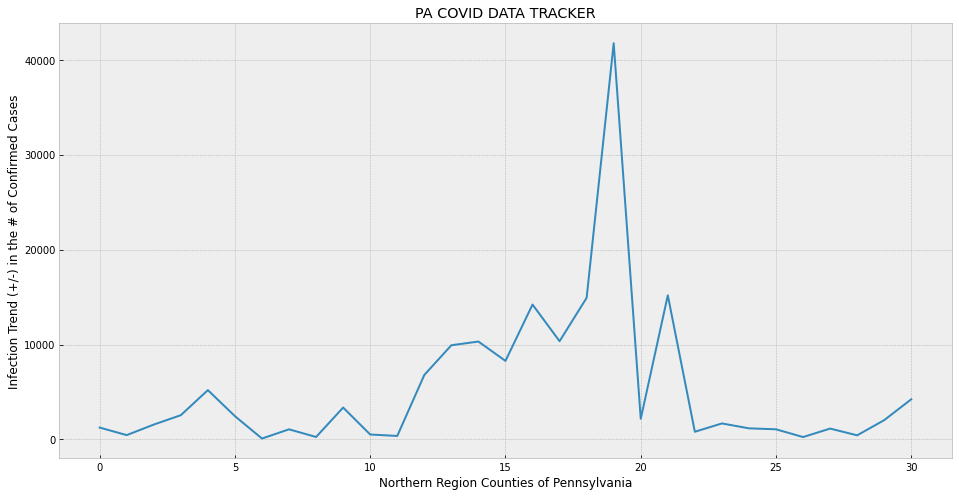

In [ ]:
#visualize the daily growth of the Pennsylvania COVID data
#On the x-axis 0 = ADAMS and 30 = WESTMORELAND.

plt.figure(figsize=(16,8))
plt.title('PA COVID DATA TRACKER')
plt.xlabel('Northern Region Counties of Pennsylvania')
plt.ylabel('Infection Trend (+/-) in the # of Confirmed Cases')
plt.plot(df['Confirmed'])
plt.show()

In [ ]:
#get the confirmed growth per county
df = df[['Confirmed']]
df.head(36)
#df.tail()

,Confirmed
0,1251
1,456
2,1566
3,2556
4,5197
5,2454
6,96
7,1066
8,259
9,3359


In [ ]:
#get the daily confirmed growth
df = df[['Confirmed']]
df.head()
#df.tail(13)

,Confirmed
0,978
1,4313
2,276
3,1079
4,988


In [ ]:
#Create a variable to predict 'x' months out into the future
future_trend = 3
#create a new column (target) shifted 'x' units/months up
df['Prediction'] = df[['Confirmed']].shift(-future_trend)
df.head(36)
#df.tail(10)

,Confirmed,Prediction
0,1251,2556.0
1,456,5197.0
2,1566,2454.0
3,2556,96.0
4,5197,1066.0
5,2454,259.0
6,96,3359.0
7,1066,519.0
8,259,369.0
9,3359,6794.0


In [ ]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_trend]
print(X)

[[ 1251]
 [  456]
 [ 1566]
 [ 2556]
 [ 5197]
 [ 2454]
 [   96]
 [ 1066]
 [  259]
 [ 3359]
 [  519]
 [  369]
 [ 6794]
 [ 9925]
 [10313]
 [ 8275]
 [14210]
 [10350]
 [14922]
 [41747]
 [ 2171]
 [15183]
 [  810]
 [ 1685]
 [ 1171]
 [ 1068]
 [  251]
 [ 1145]]


In [ ]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'y' rows/days
Y = np.array(df.drop(['Prediction'], 1))[:-future_trend]
print(Y)

[[ 1251]
 [  456]
 [ 1566]
 [ 2556]
 [ 5197]
 [ 2454]
 [   96]
 [ 1066]
 [  259]
 [ 3359]
 [  519]
 [  369]
 [ 6794]
 [ 9925]
 [10313]
 [ 8275]
 [14210]
 [10350]
 [14922]
 [41747]
 [ 2171]
 [15183]
 [  810]
 [ 1685]
 [ 1171]
 [ 1068]
 [  251]
 [ 1145]]


In [ ]:
#create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
Y = np.array(df['Prediction'])[:-future_trend]
print(Y)

[ 2556.  5197.  2454.    96.  1066.   259.  3359.   519.   369.  6794.
  9925. 10313.  8275. 14210. 10350. 14922. 41747.  2171. 15183.   810.
  1685.  1171.  1068.   251.  1145.   434.  2036.  4235.]


In [ ]:
#split the data into 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)

In [ ]:
#Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Create the models
#Create the decision tree regression model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-3]
x_future = x_future.tail(3)
x_future = np.array(x_future)
x_future

array([[1068],
       [ 251],
       [1145]])

In [ ]:
#show the tree prediction model
tree_prediction = tree.predict(x_future)
print(tree_prediction)


[ 519. 2036. 4235.]


In [ ]:
#show the linear regression prediction model
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[3212.44475151 2405.67472342 3288.48060483]


In [ ]:
#show the SVR prediction model 
svr_rbf_prediction = svr_rbf.predict(x_future)
print(svr_rbf)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


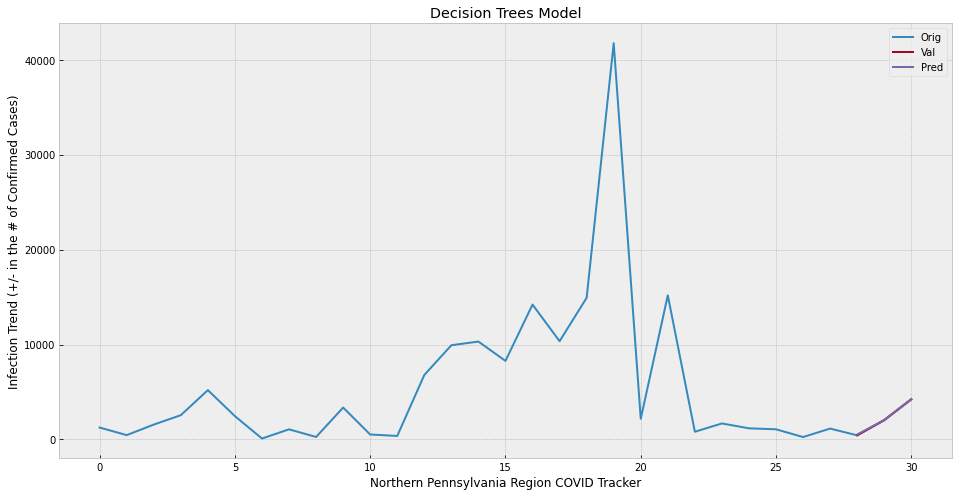

In [ ]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Trees Model')
plt.xlabel('Northern Pennsylvania Region COVID Tracker')
plt.ylabel('Infection Trend (+/- in the # of Confirmed Cases)')
plt.plot(df['Confirmed'])
plt.plot(valid[['Confirmed', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
tree.score(x_test, y_test)

-0.665203950477852

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


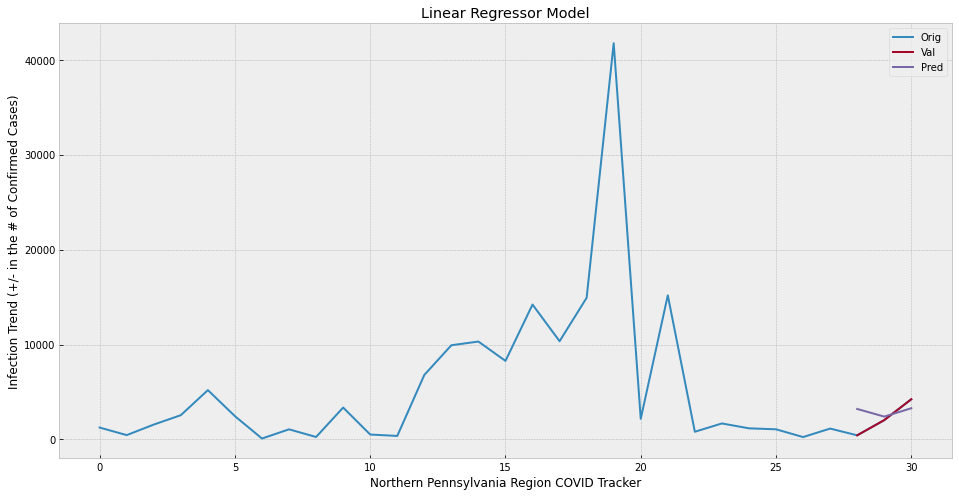

In [ ]:
#visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regressor Model')
plt.xlabel('Northern Pennsylvania Region COVID Tracker')
plt.ylabel('Infection Trend (+/- in the # of Confirmed Cases)')
plt.plot(df['Confirmed'])
plt.plot(valid[['Confirmed', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
lr.score(x_test, y_test)

-36.9556278255321

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


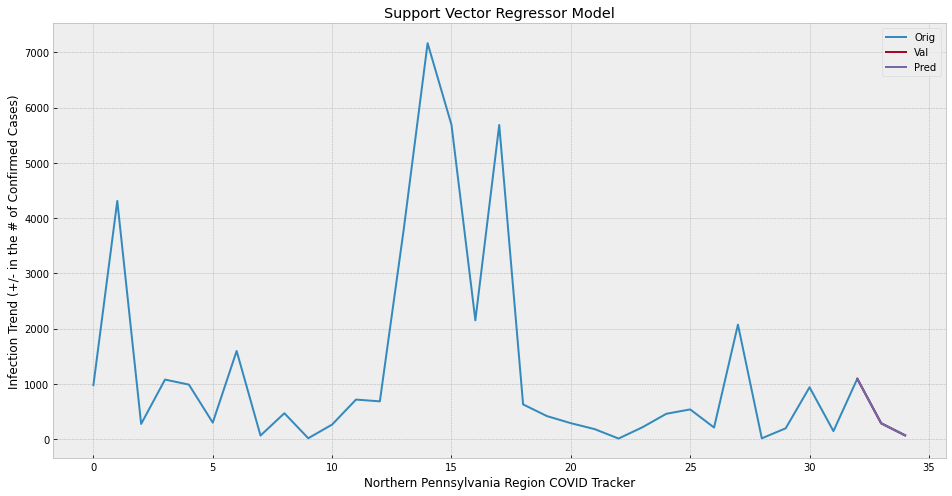

In [ ]:
#visualize the data
predictions = svr_rbf_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Support Vector Regressor Model')
plt.xlabel('Northern Pennsylvania Region COVID Tracker')
plt.ylabel('Infection Trend (+/- in the # of Confirmed Cases)')
plt.plot(df['Confirmed'])
plt.plot(valid[['Confirmed', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
svr_rbf.score(x_test, y_test)

-0.06578171020905388

In [ ]:
County 	Region 	Cases 	Confirmed 	Probable 	PersonsWithNegativePCR

In [ ]:
feature_cols = ['Confirmed'] 
Y = df[feature_cols] # Features
X = df.Confirmed # Target variable


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [ ]:
# import the class and create classifier/model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30, 30, 20),activation='relu',random_state=101)

In [ ]:

x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [ ]:
#train model
model.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:

#predict
Y_predict = model.predict(x_test)

In [ ]:
# import confusion_matrix and classification_report classes
from sklearn.metrics import classification_report, confusion_matrix  

In [ ]:
#computer performance measures
print(confusion_matrix(y_test, Y_predict))  
print(classification_report(y_test, Y_predict)) 

[[0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

         369       0.00      0.00      0.00       1.0
         519       0.00      0.00      0.00       1.0
         810       0.00      0.00      0.00       1.0
        1068       0.00      0.00      0.00       1.0
        1145       0.00      0.00      0.00       1.0
        1566       0.00      0.00      0.00       1.0
        2036       0.00      0.00      0.00       1.0
        9925       0.00      0.00      0.00       1.0
       10350       0.00      0.00      0.00       0.0
       14922       0.00      0.00      0.00       0.0
       41747       0.00      0.00      0.00       0.0

    accuracy                           0.00       8.0
   macro avg       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn import metrics
#Calculate performance measures:
print("Accuracy:",metrics.accuracy_score(y_test, Y_predict))
print("Precision:",metrics.mean_squared_error(y_test, Y_predict))
print("Recall:",metrics.mean_absolute_error(y_test, Y_predict))
print("ConfuusionMatrix:",metrics.multilabel_confusion_matrix(y_test, Y_predict))
print("ConfuusionMatrix:",metrics.plot_confusion_matrix(y_test, Y_predict))

Text(0.5, 257.44, 'Predicted label')

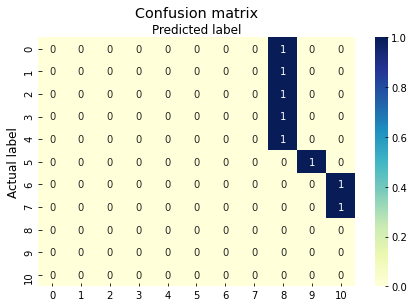

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cnf_matrix =confusion_matrix(y_test, Y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')